In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import io
db = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
true_results = pd.read_csv(io.BytesIO(uploaded['gender_submission.csv']))

In [ ]:
print(db.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
data=pd.concat([db,test])

In [ ]:
data.shape

(1309, 12)

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


*****************************Processing missing data and duplicates*****************************************

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [ ]:
data.columns=data.columns.str.lower()
data.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [ ]:
data['age']=data['age'].fillna(db['Age'].median())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1309 non-null   int64  
 1   survived     891 non-null    float64
 2   pclass       1309 non-null   int64  
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1309 non-null   float64
 6   sibsp        1309 non-null   int64  
 7   parch        1309 non-null   int64  
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [ ]:
data.loc[data['embarked'].isnull()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
data['embarked'].fillna(method='ffill', inplace=True)

In [ ]:
data['embarked'].isnull().sum()

0

In [ ]:
data.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.503186,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,12.905241,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


************************data engineering********************

In [ ]:
db.groupby(['Pclass','Survived']).Fare.agg([max,min,'mean'])

max      min       mean
Pclass Survived                              
1      0         263.0000   0.0000  64.684007
       1         512.3292  25.9292  95.608029
2      0          73.5000   0.0000  19.412328
       1          65.0000  10.5000  22.055700
3      0          69.5500   0.0000  13.669364
       1          56.4958   0.0000  13.694887

In [ ]:
ypclass1=db.loc[db['Pclass']==1,'Fare'].describe([.33,.66])
ypclass2=db.loc[db['Pclass']==2,'Fare'].describe([.33,.66])
ypclass3=db.loc[db['Pclass']==3,'Fare'].describe([.33,.66])

In [ ]:
data['fare'].fillna(ypclass3['mean'],inplace=True)

In [ ]:
data['price rating']=1
data.loc[(data['pclass']==1) & (data['fare'] <= ypclass1.loc['33%']),'price rating']='cheap'
data.loc[(data['pclass']==1) & (data['fare'] <= ypclass1.loc['66%']) & (data['fare'] > ypclass1.loc['33%']),'price rating']='medium'
data.loc[(data['pclass']==1) & (data['fare'] > ypclass1.loc['66%']),'price rating']='expensive'
data.loc[(data['pclass']==2) & (data['fare'] <= ypclass2.loc['33%']),'price rating']='cheap'
data.loc[(data['pclass']==2) & (data['fare'] <= ypclass2.loc['66%']) & (data['fare'] > ypclass2.loc['33%']),'price rating']='medium'
data.loc[(data['pclass']==2) & (data['fare'] > ypclass2.loc['66%']),'price rating']='expensive'
data.loc[(data['pclass']==3) & (data['fare'] <= ypclass3.loc['33%']),'price rating']='cheap'
data.loc[(data['pclass']==3) & (data['fare'] <= ypclass3.loc['66%']) & (data['fare'] > ypclass3.loc['33%']),'price rating']='medium'
data.loc[(data['pclass']==3) & (data['fare'] > ypclass3.loc['66%']),'price rating']='expensive'

In [ ]:
data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,price rating
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,cheap
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,medium
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,medium
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,medium
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,medium


In [ ]:
data['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
413    28.0
414    39.0
415    38.5
416    28.0
417    28.0
Name: age, Length: 1309, dtype: float64

In [ ]:
data['age_group']=1
data.loc[data['age']<=3,'age_group']='b'
data.loc[(data['age'] > 3) & (data['age'] <= 11),'age_group']='c'
data.loc[(data['age'] > 11) & (data['age'] <= 18),'age_group']='t'
data.loc[(data['age'] > 18) & (data['age'] <= 60),'age_group']='a'
data.loc[data['age'] > 60 ,'age_group']='o'

In [ ]:
data.groupby('age_group').passengerid.count()

age_group
a    1083
b      41
c      49
o      33
t     103
Name: passengerid, dtype: int64

data['initials']=0
for i in (data):
    data['initials']=data.name.str.extract('([A-Za-z]+)\.')
data.initials.unique()
pivot_initials=pd.pivot_table(data,values='passengerid', index='initials',aggfunc='count')
pivot_initials.sort_values( by='passengerid', ascending=False).

********************** Models ***********************

In [ ]:
data_for_models=data.drop(['passengerid','name','age','ticket','fare','cabin'],axis=1)

In [ ]:
data_for_models.head()

,survived,pclass,sex,sibsp,parch,embarked,price rating,age_group
0,0.0,3,male,1,0,S,cheap,a
1,1.0,1,female,1,0,C,medium,a
2,1.0,3,female,0,0,S,medium,a
3,1.0,1,female,1,0,S,medium,a
4,0.0,3,male,0,0,S,medium,a


In [ ]:
db[-1:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
X_train=data_for_models.loc[data_for_models['survived'].notnull(),data_for_models.columns!='survived']

In [ ]:
X_train.head()

,pclass,sex,sibsp,parch,embarked,price rating,age_group
0,3,male,1,0,S,cheap,a
1,1,female,1,0,C,medium,a
2,3,female,0,0,S,medium,a
3,1,female,1,0,S,medium,a
4,3,male,0,0,S,medium,a


In [ ]:
y=data_for_models.loc[data_for_models['survived'].notnull(),'survived']

In [ ]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: survived, Length: 891, dtype: float64

In [ ]:
y_test=true_results.iloc[:,1]

In [ ]:
X_test=data_for_models.loc[data_for_models['survived'].isnull(),data_for_models.columns!='survived']

In [ ]:
X_test

,pclass,sex,sibsp,parch,embarked,price rating,age_group
0,3,male,0,0,Q,cheap,a
1,3,female,1,0,S,cheap,a
2,2,male,0,0,Q,cheap,o
3,3,male,0,0,S,medium,a
4,3,female,1,1,S,expensive,a
...,...,...,...,...,...,...,...
413,3,male,0,0,S,medium,a
414,1,female,0,0,C,expensive,a
415,3,male,0,0,S,cheap,a
416,3,male,0,0,S,medium,a


In [ ]:
print(X_train.shape)
print(X_test.shape)

(891, 7)
(418, 7)


In [ ]:
print(true_results.shape)
print(y.shape)

(418, 2)
(891,)


In [ ]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

****************************** KNN model *************************

###### X_test

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train,y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_prd=knn.predict(X_test)

In [ ]:
accuracy_score(y_test, y_prd)

0.8038277511961722

In [ ]:
confusion_matrix(y_test, y_prd)

array([[207,  59],
       [ 23, 129]], dtype=int64)

************ optimization of model KNN ************

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 16)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 16)})

In [ ]:
gridsearch.best_params_

{'n_neighbors': 9}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y)
y_pred=knn.predict(X_test)
accuracy_score_knn=accuracy_score(y_test, y_pred)
print(accuracy_score_knn)
print(confusion_matrix(y_test, y_pred))

0.8971291866028708
[[246  20]
 [ 23 129]]


In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       266
           1       0.87      0.85      0.86       152

    accuracy                           0.90       418
   macro avg       0.89      0.89      0.89       418
weighted avg       0.90      0.90      0.90       418



********************************** Decision Tree Model *****************************************************************

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data_for_models.head()

,survived,pclass,sex,sibsp,parch,embarked,price rating,age_group
0,0.0,3,male,1,0,S,cheap,a
1,1.0,1,female,1,0,C,medium,a
2,1.0,3,female,0,0,S,medium,a
3,1.0,1,female,1,0,S,medium,a
4,0.0,3,male,0,0,S,medium,a


In [ ]:
data_tree=data_for_models
data_tree

,survived,pclass,sex,sibsp,parch,embarked,price rating,age_group
0,0.0,3,male,1,0,S,cheap,a
1,1.0,1,female,1,0,C,medium,a
2,1.0,3,female,0,0,S,medium,a
3,1.0,1,female,1,0,S,medium,a
4,0.0,3,male,0,0,S,medium,a
...,...,...,...,...,...,...,...,...
413,NaN,3,male,0,0,S,medium,a
414,NaN,1,female,0,0,C,expensive,a
415,NaN,3,male,0,0,S,cheap,a
416,NaN,3,male,0,0,S,medium,a


In [ ]:
data_tree['price rating'].unique()
data_tree['age_group'].unique()

array(['a', 'b', 't', 'c', 'o'], dtype=object)

In [ ]:
data_tree['price rating']=data_tree['price rating'].replace({'cheap':1,'medium':2,'expensive':3})

In [ ]:
data_tree['sex']=data_tree['sex'].replace({'male':1,'female':2})
data_tree['embarked']=data_tree['embarked'].replace({'S':1,'C':2,'Q':3})
data_tree['age_group']=data_tree['age_group'].replace({'a':1,'b':2,'t':3,'c':4,'o':5})
data_tree

,survived,pclass,sex,sibsp,parch,embarked,price rating,age_group
0,0.0,3,1,1,0,1,1,1
1,1.0,1,2,1,0,2,2,1
2,1.0,3,2,0,0,1,2,1
3,1.0,1,2,1,0,1,2,1
4,0.0,3,1,0,0,1,2,1
...,...,...,...,...,...,...,...,...
413,NaN,3,1,0,0,1,2,1
414,NaN,1,2,0,0,2,3,1
415,NaN,3,1,0,0,1,1,1
416,NaN,3,1,0,0,1,2,1


In [ ]:
X_train_tree=data_tree.iloc[:891,].drop('survived', axis=1)
X_test_tree=data_tree.iloc[891:,].drop('survived', axis=1)
y_tree=data_tree.loc[data_tree['survived'].notnull(),'survived']
X_test_tree

,pclass,sex,sibsp,parch,embarked,price rating,age_group
0,3,1,0,0,3,1,1
1,3,2,1,0,1,1,1
2,2,1,0,0,3,1,5
3,3,1,0,0,1,2,1
4,3,2,1,1,1,3,1
...,...,...,...,...,...,...,...
413,3,1,0,0,1,2,1
414,1,2,0,0,2,3,1
415,3,1,0,0,1,1,1
416,3,1,0,0,1,2,1


In [ ]:
print(X_train_tree.shape)
print(X_test_tree.shape)
print(y_tree.shape)
print(y_test.shape)

(891, 7)
(418, 7)
(891,)
(418,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf=DecisionTreeClassifier() 
clf.fit(X_train_tree,y_tree) 
y_pred=clf.predict(X_test_tree) 
accuracy_score_tree=accuracy_score(y_test, y_pred) 
print(accuracy_score_tree) 
print(confusion_matrix(y_test, y_pred))

0.8971291866028708
[[249  17]
 [ 26 126]]


************************ Decision Tree Model optimize *****************************************************************

In [ ]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

In [ ]:
n_components = list(range(1,X_train_tree.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [ ]:
parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

In [ ]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train_tree, y_tree)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7]})

In [ ]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])


Best Criterion: gini
Best max_depth: 6
Best Number Of Components: 7

DecisionTreeClassifier(max_depth=6)


In [ ]:
clf=DecisionTreeClassifier(criterion='entropy', max_depth=8)
clf.fit(X_train_tree,y_tree) 
y_pred=clf.predict(X_test_tree) 
accuracy_score_tree=accuracy_score(y_test, y_pred) 
print(accuracy_score_tree) 
print(confusion_matrix(y_test, y_pred))

0.8923444976076556
[[254  12]
 [ 33 119]]


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
cfp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),  display_labels=None)

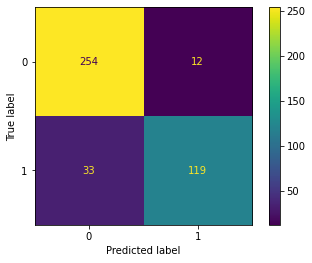

In [ ]:
cfp.plot()

*********************** random forest ***************************************************

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [ ]:
clf=RandomForestClassifier(n_estimators=100)

In [ ]:
clf.fit(X_train_tree,y_tree)
y_pred=clf.predict(X_test_tree) 

In [ ]:
accuracy_score_rf=accuracy_score(y_test, y_pred) 
print(accuracy_score_rf) 

0.8899521531100478


<AxesSubplot:>

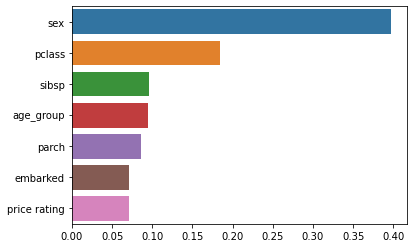

In [ ]:
feature_imp = pd.Series(clf.feature_importances_, index=X_train_tree.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)

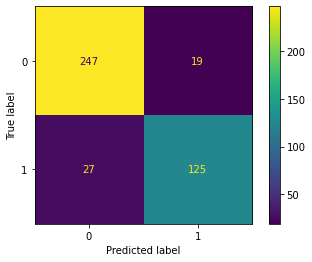

In [ ]:
cfp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),  display_labels=None)
cfp.plot()

In [ ]:
new_train = X_train_tree.drop(['price rating','embarked'], axis=1)
new_test = X_test_tree.drop(['price rating','embarked'], axis=1)

clf.fit(new_train,y_tree)
y_pred=clf.predict(new_test)

accuracy_score_rf=accuracy_score(y_test, y_pred) 
print(accuracy_score_rf) 


0.9473684210526315
